In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, optimizers, backend, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import mnist

In [27]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [28]:
xtrain, xtest = xtrain/255.0, xtest/255.0

In [29]:
xtrain.shape

(60000, 28, 28)

In [30]:
ytrain = tf.keras.utils.to_categorical(ytrain, 10)

In [31]:
ytest = tf.keras.utils.to_categorical(ytest, 10)

In [32]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
history = model.fit(xtrain, ytrain, epochs= 5, batch_size = 32, validation_data = (xtest, ytest))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.8418 - loss: 0.0902 - val_accuracy: 0.9862 - val_loss: 0.0101
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9834 - loss: 0.0115 - val_accuracy: 0.9879 - val_loss: 0.0088
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9892 - loss: 0.0075 - val_accuracy: 0.9905 - val_loss: 0.0071
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9926 - loss: 0.0053 - val_accuracy: 0.9896 - val_loss: 0.0073
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9937 - loss: 0.0043 - val_accuracy: 0.9899 - val_loss: 0.0072


In [36]:
test_loss, test_acc = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9870 - loss: 0.0089


In [37]:
test_loss

0.007154886610805988

In [38]:
test_acc

0.9898999929428101

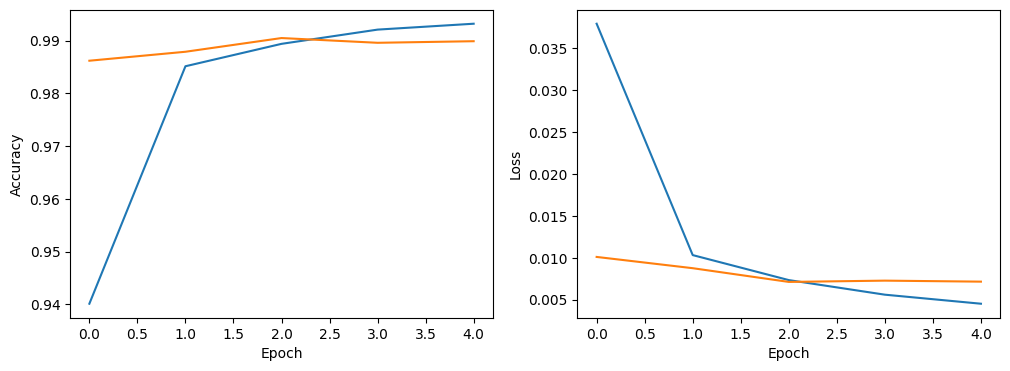

In [39]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [40]:
ytest = np.argmax(ytest, axis = 1)
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


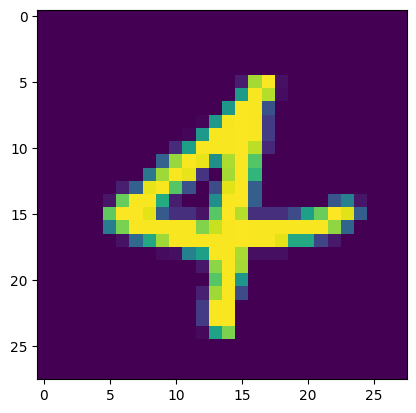

4 4


In [42]:
plt.imshow(xtrain[150])
plt.show()
print(ytest[159], ypred[159])